# Random forest cross-validation

Run cross validation by station (leave-one out)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneGroupOut

In [14]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()
#X = np.load("./rbfs/phi_reduce.npy")
#y = np.load("./rbfs/y.npy")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
1,1,0.999728,0.941552,0.773095,0.553410,0.345372,0.187912,0.089135,0.036861,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,2005,2023-01-08
2,2,0.998914,0.948942,0.785919,0.567468,0.357216,0.196041,0.093797,0.039125,0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,2005,2023-01-08
3,3,0.997558,0.955871,0.798521,0.581567,0.369266,0.204411,0.098650,0.041506,0.015225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
4,4,0.995663,0.962327,0.810885,0.595692,0.381514,0.213022,0.103697,0.044008,0.016283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08


In [15]:
dat2 = dat[dat['date'] == "2023-01-01"]
dat2.shape

(0, 221)

In [16]:
dat2 = dat2.groupby('site')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


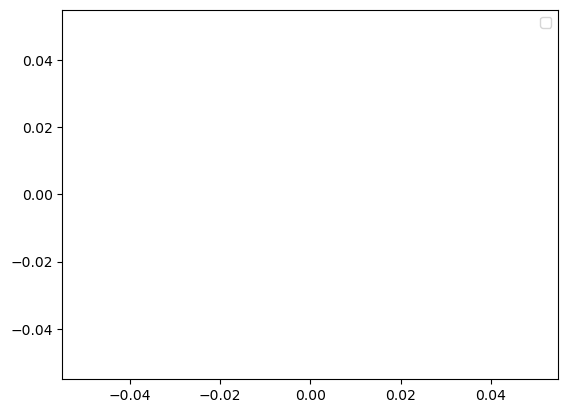

In [17]:
# Plot
fig, ax = plt.subplots()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in dat2:
    ax.plot(group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [18]:
X = dat.iloc[:, 1:218]
y = dat['y']
groups = dat['site']
logo = LeaveOneGroupOut()
logo.get_n_splits(X, y, groups)

8

In [19]:
mygrps = groups.unique()
n_grps = len(mygrps)

## Cross-validation loop

In [20]:
my_mae = np.empty(n_grps)
my_y_true = []
my_y_pred = []

In [21]:
for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"Site {mygrps[i]}:")
    #print(f"  Train: index={train_index}, group={groups[train_index]}")
    #print(f"  Test:  index={test_index}, group={groups[test_index]}")

    # Split out data
    X_train = X.iloc[train_index, :]
    print(X_train.shape)
    y_train = y[train_index]
    n_feat = X_train.shape[1]
    
    X_test = X.iloc[test_index, :]
    print(X_test.shape)
    y_test = y[test_index]

    # Build model
    aq_rf = ensemble.RandomForestRegressor()

    # Train model
    aq_rf.fit(X_train, y_train)
    
    ## Predict for test set
    y_test_pred = aq_rf.predict(X_test)
    my_mae[i] = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE: {my_mae[i]}")
    
    my_y_true.append(y_test.to_numpy())
    my_y_pred.append(y_test_pred)


Fold 0:
Site 2005:
(1002, 217)
(142, 217)
MAE: 0.005913098591549294
Fold 1:
Site 3006:
(1001, 217)
(143, 217)
MAE: 0.005438741258741264
Fold 2:
Site 3010:
(1001, 217)
(143, 217)
MAE: 0.0033757342657342623
Fold 3:
Site 3013:
(1000, 217)
(144, 217)
MAE: 0.011505416666666676
Fold 4:
Site 3014:
(1000, 217)
(144, 217)
MAE: 0.00544534722222223
Fold 5:
Site 3015:
(1000, 217)
(144, 217)
MAE: 0.0032672222222222273
Fold 6:
Site 3016:
(1003, 217)
(141, 217)
MAE: 0.005322624113475175
Fold 7:
Site 4002:
(1001, 217)
(143, 217)
MAE: 0.0047448951048950985


In [22]:
my_y_pred

[array([0.0271 , 0.02885, 0.0309 , 0.0314 , 0.03026, 0.03346, 0.03323,
        0.03367, 0.03448, 0.03518, 0.03476, 0.03531, 0.03457, 0.0345 ,
        0.03491, 0.03532, 0.03521, 0.03342, 0.03199, 0.02906, 0.01883,
        0.01623, 0.01275, 0.01033, 0.00944, 0.00981, 0.01143, 0.01656,
        0.01911, 0.01952, 0.01787, 0.02138, 0.02693, 0.02828, 0.02959,
        0.03121, 0.03271, 0.03304, 0.03242, 0.03136, 0.0311 , 0.03091,
        0.03034, 0.03069, 0.03109, 0.03084, 0.03034, 0.03021, 0.0297 ,
        0.03011, 0.02995, 0.02961, 0.02962, 0.02921, 0.02757, 0.02556,
        0.02047, 0.02029, 0.02164, 0.02843, 0.02823, 0.0264 , 0.02606,
        0.02797, 0.02921, 0.02926, 0.03319, 0.03166, 0.02842, 0.02196,
        0.021  , 0.0194 , 0.02111, 0.02499, 0.02124, 0.02169, 0.02845,
        0.02853, 0.02407, 0.01993, 0.01936, 0.02349, 0.02825, 0.029  ,
        0.03015, 0.0321 , 0.03036, 0.02666, 0.02182, 0.01974, 0.01627,
        0.01877, 0.01771, 0.01708, 0.01823, 0.01875, 0.02271, 0.02405,
      

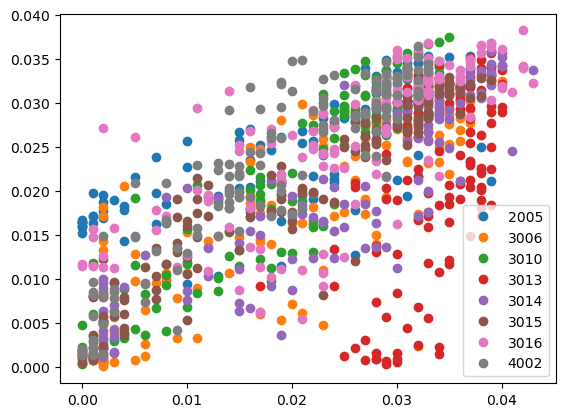

In [23]:
plt.figure()
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], my_y_pred[i], 'o', label = mygrps[i])

plt.legend()
plt.show()

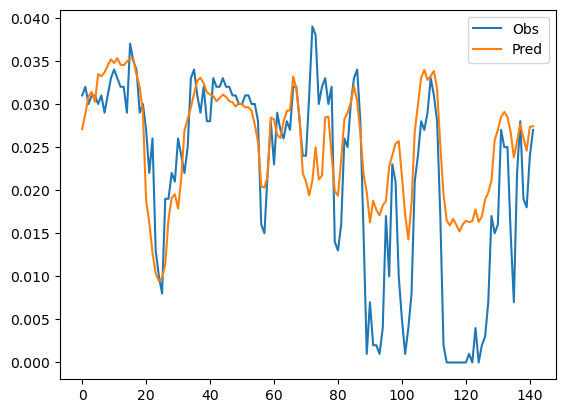

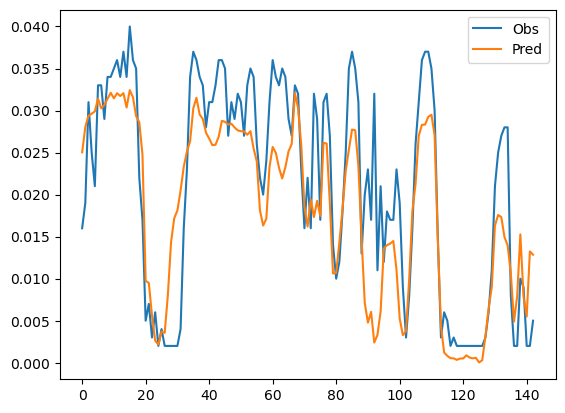

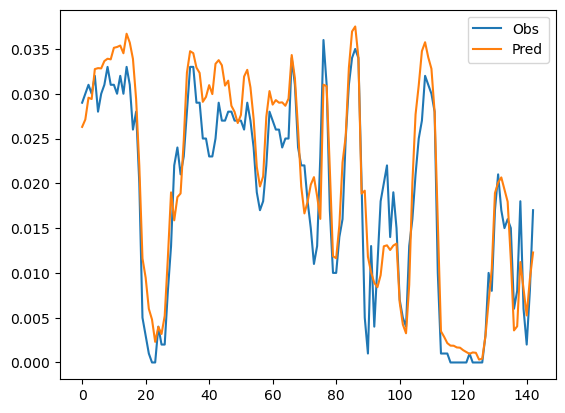

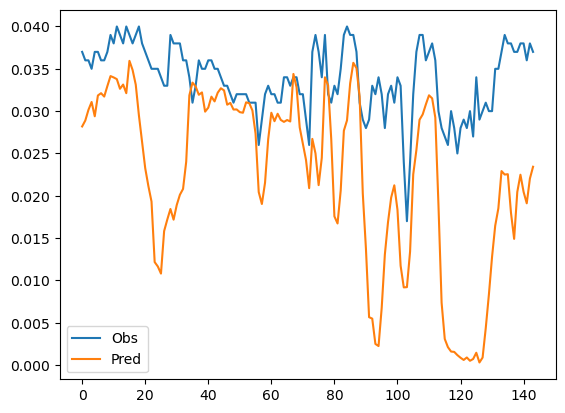

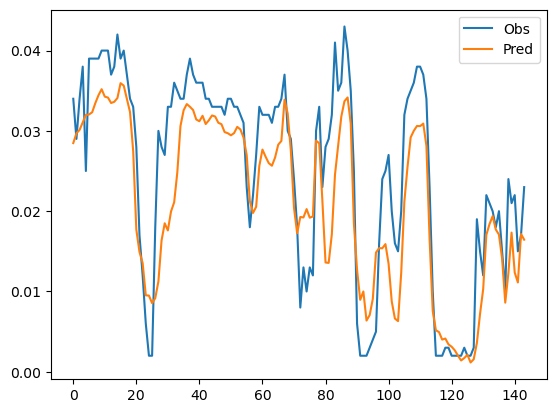

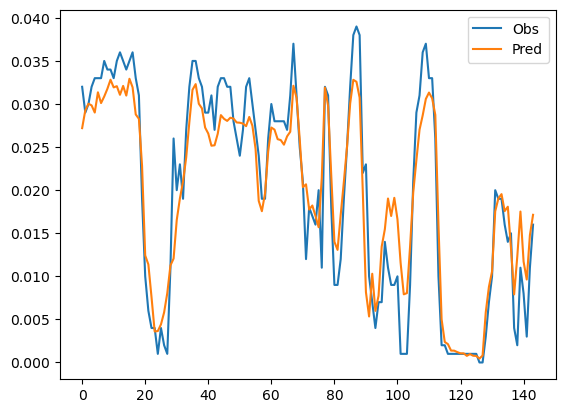

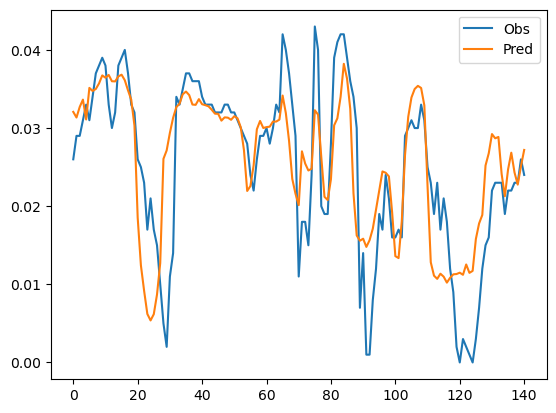

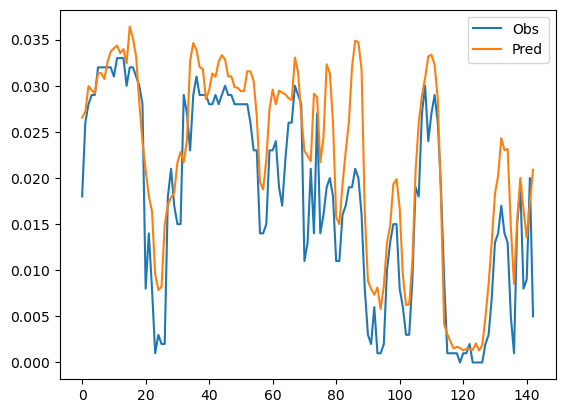

In [24]:
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], label = "Obs")
    plt.plot(my_y_pred[i], label = "Pred")
    plt.legend()
    plt.show()